In [4]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import re
import glob
import seaborn as sns
from datetime import datetime

In [2]:
### Experiment parameters
models = ['randomforest', 'lstm', 'transformer', 'hybrid']
datasets = ["uci", "lab42"]
metrics_dir = "checkpoints_and_metrics"
features = ['airquality', 'light', 'hour_of_day', 'is_weekend', 'airquality_delta', 'airquality_trend']
all_results = []

### Load latest saved metrics
def load_latest_metrics(model, pattern):
    """
    Load the latest saved metrics for a given model and pattern.
    :param model: Name of model
    :param pattern: Beginning of the filename to search for (e.g. "hybrid_track1")
    :return: Metrics dictionary
    """
    timestamp_regex = r"\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}"
    base_pattern = rf"{re.escape(model)}_{re.escape(pattern)}_{timestamp_regex}\.json"

    files = sorted(
        [
            f for f in glob.glob(f"{metrics_dir}/{model}_{pattern}_*.json")
            if re.fullmatch(base_pattern, os.path.basename(f))
        ],
        key=os.path.getmtime,
        reverse=True
    )

    if not files:
        print(f"No metrics files found for {model} with pattern {pattern}.")
        return None

    with open(files[0], 'r') as f:
        metrics = json.load(f)
    return metrics

### View results as a table
def view_results_as_table(results):
    table = []
    for model, track in results.items():
        for track, metrics in track.items():
            if metrics:
                row = {
                    "Model": model,
                    "Track": track,
                    "Accuracy": metrics["accuracy"],
                    "F1 Score": metrics["f1"],
                    "Precision": metrics["precision"],
                    "Recall": metrics["recall"],
                    "Loss": metrics["loss"],
                }
                table.append(row)

    # Convert to DataFrame for better visualization and sort by F1 Score
    df = pd.DataFrame(table).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

    return df


### Plot Confusion Matrix
def plot_confusion_matrix(cm, title, ax):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Track 1

In [13]:
### Load metrics for Track 1 and display
results_track1 = {}

for model in models:
    metrics = load_latest_metrics(model, "track1")
    if metrics:
        results_track1[model] = {"track1": metrics}

all_results.append(results_track1)
view_results_as_table(results_track1)

,Model,Track,Accuracy,F1 Score,Precision,Recall,Loss
0,lstm,track1,0.975786,0.944915,0.897184,0.998011,0.105969
1,hybrid,track1,0.975062,0.942823,0.901543,0.988066,0.147989
2,transformer,track1,0.965025,0.922084,0.859476,0.994530,0.207736
3,randomforest,track1,0.950124,0.891685,0.813448,0.986574,NaN


# Track 2

## All Rooms

In [14]:
### Load metrics for Track 1 and display
results_track2_all = {}

for model in models:
    metrics = load_latest_metrics(model, "track2")
    if metrics:
        results_track2_all[model] = {"track2_all": metrics}

all_results.append(results_track2_all)
view_results_as_table(results_track2_all)

,Model,Track,Accuracy,F1 Score,Precision,Recall,Loss
0,lstm,track2_all,0.902119,0.763980,0.657380,0.911844,0.340379
1,hybrid,track2_all,0.896734,0.760253,0.637096,0.942434,0.339060
2,randomforest,track2_all,0.883404,0.728905,0.611437,0.902240,NaN
3,transformer,track2_all,0.875840,0.723244,0.590168,0.933805,0.405237


## Singular Rooms

### Room_11

In [5]:
### Load metrics and display
results_track2_room11 = {}

for model in models:
    metrics = load_latest_metrics(model, "track2_room11")
    if metrics:
        results_track2_room11[model] = {"track2_room11": metrics}

all_results.append(results_track2_room11)
view_results_as_table(results_track2_room11)

,Model,Track,Accuracy,F1 Score,Precision,Recall,Loss
0,hybrid,track2_l110,0.916589,0.791475,0.718790,0.880513,0.411031
1,randomforest,track2_l110,0.923741,0.791380,0.778630,0.804555,NaN
2,transformer,track2_l110,0.911666,0.783844,0.699762,0.890891,0.395952
3,lstm,track2_l110,0.895289,0.751583,0.655269,0.881090,0.384993


### Room_02

In [6]:
### Load metrics and display
results_track2_room02 = {}

for model in models:
    metrics = load_latest_metrics(model, "track2_room02")
    if metrics:
        results_track2_room02[model] = {"track2_room02": metrics}

all_results.append(results_track2_room02)
view_results_as_table(results_track2_room02)

,Model,Track,Accuracy,F1 Score,Precision,Recall,Loss
0,hybrid,track2_l009,0.961328,0.934237,0.980206,0.892386,0.140365
1,transformer,track2_l009,0.940885,0.903041,0.911922,0.894332,0.449377
2,randomforest,track2_l009,0.931224,0.880546,0.946059,0.823519,NaN
3,lstm,track2_l009,0.859766,0.798940,0.715030,0.905161,0.530167


### Room_06

In [7]:
### Load metrics and display
results_track2_room06 = {}

for model in models:
    metrics = load_latest_metrics(model, "track2_room06")
    if metrics:
        results_track2_room06[model] = {"track2_room06": metrics}

all_results.append(results_track2_room06)
view_results_as_table(results_track2_room06)

,Model,Track,Accuracy,F1 Score,Precision,Recall,Loss
0,randomforest,track2_l101,0.923637,0.791156,0.778196,0.804555,NaN
1,lstm,track2_l101,0.896377,0.752369,0.659538,0.875613,0.408170
2,hybrid,track2_l101,0.894512,0.742032,0.662106,0.843903,0.599327
3,transformer,track2_l101,0.884976,0.735064,0.627279,0.887576,0.443860


# Track 3

## All Rooms

In [8]:
### Load metrics and display
results_track3_all = {}

for model in models:
    metrics = load_latest_metrics(model, "track3")
    if metrics:
        results_track3_all[model] = {"track3_all": metrics}

all_results.append(results_track3_all)
view_results_as_table(results_track3_all)

,Model,Track,Accuracy,F1 Score,Precision,Recall,Loss
0,hybrid,track3_all,0.926297,0.810654,0.732068,0.908141,0.331491
1,transformer,track3_all,0.923203,0.803212,0.723852,0.902116,0.332770
2,lstm,track3_all,0.915132,0.787146,0.697495,0.903242,0.350975
3,randomforest,track3_all,0.898955,0.755295,0.651942,0.897589,NaN


## Singular Rooms

### Room_11

In [9]:
### Load metrics and display
results_track3_room11 = {}

for model in models:
    metrics = load_latest_metrics(model, "track3_room11")
    if metrics:
        results_track3_room11[model] = {"track3_room11": metrics}

all_results.append(results_track3_room11)
view_results_as_table(results_track3_room11)

,Model,Track,Accuracy,F1 Score,Precision,Recall,Loss
0,transformer,track3_l110,0.922969,0.759434,0.693141,0.839748,0.477453
1,hybrid,track3_l110,0.917786,0.745177,0.675941,0.830216,0.391454
2,lstm,track3_l110,0.918776,0.734395,0.697396,0.775540,0.446712
3,randomforest,track3_l110,0.914271,0.694676,0.717158,0.673561,NaN


### Room_02

In [9]:
### Load metrics and display
results_track3_room02 = {}

for model in models:
    metrics = load_latest_metrics(model, "track3_room02")
    if metrics:
        results_track3_room02[model] = {"track3_room02": metrics}

all_results.append(results_track3_room02)
view_results_as_table(results_track3_room02)

,Model,Track,Accuracy,F1 Score,Precision,Recall,Loss
0,transformer,track3_l009,0.964010,0.938757,0.985669,0.896108,0.119493
1,hybrid,track3_l009,0.963073,0.936390,0.996658,0.882995,0.141310
2,lstm,track3_l009,0.932734,0.882136,0.957504,0.817766,0.260406
3,randomforest,track3_l009,0.931693,0.881457,0.946153,0.825042,NaN


### Room_06

In [10]:
### Load metrics and display
results_track3_room06 = {}

for model in models:
    metrics = load_latest_metrics(model, "track3_room06")
    if metrics:
        results_track3_room06[model] = {"track3_room06": metrics}

all_results.append(results_track3_room06)
view_results_as_table(results_track3_room06)

,Model,Track,Accuracy,F1 Score,Precision,Recall,Loss
0,randomforest,track3_l101,0.924466,0.793482,0.780270,0.807149,NaN
1,transformer,track3_l101,0.911899,0.782442,0.703567,0.881234,0.356647
2,hybrid,track3_l101,0.907960,0.770661,0.698012,0.860190,0.409522
3,lstm,track3_l101,0.906017,0.757634,0.706241,0.817094,0.658809


# Figures

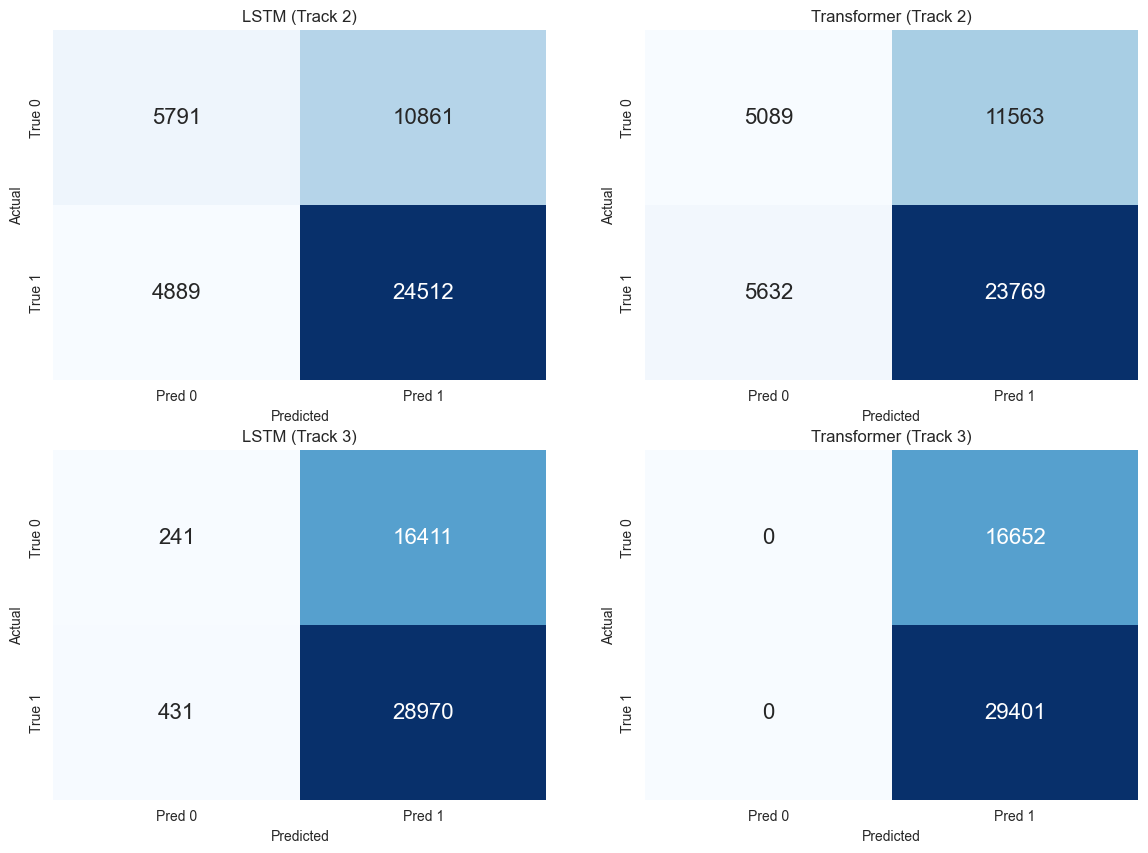

In [19]:
# Confusion matrices for Track 2 and Track 3
track2_conf_matrices = {
    "LSTM (Track 2)": [[5791, 10861], [4889, 24512]],
    "Transformer (Track 2)": [[5089, 11563], [5632, 23769]]
}

track3_conf_matrices = {
    "LSTM (Track 3)": [[241, 16411], [431, 28970]],
    "Transformer (Track 3)": [[0, 16652], [0, 29401]]
}

# Plotting function
def plot_conf_matrix(cm, title, ax):
    cm_array = np.array(cm)
    sns.heatmap(cm_array, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"], ax=ax, annot_kws={"size": 16})
    ax.set_title(title)
    ax.set_ylabel("Actual")
    ax.set_xlabel("Predicted")

# Plot all confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, (label, cm) in zip(axes[0], track2_conf_matrices.items()):
    plot_conf_matrix(cm, label, ax)

for ax, (label, cm) in zip(axes[1], track3_conf_matrices.items()):
    plot_conf_matrix(cm, label, ax)

plt.show()

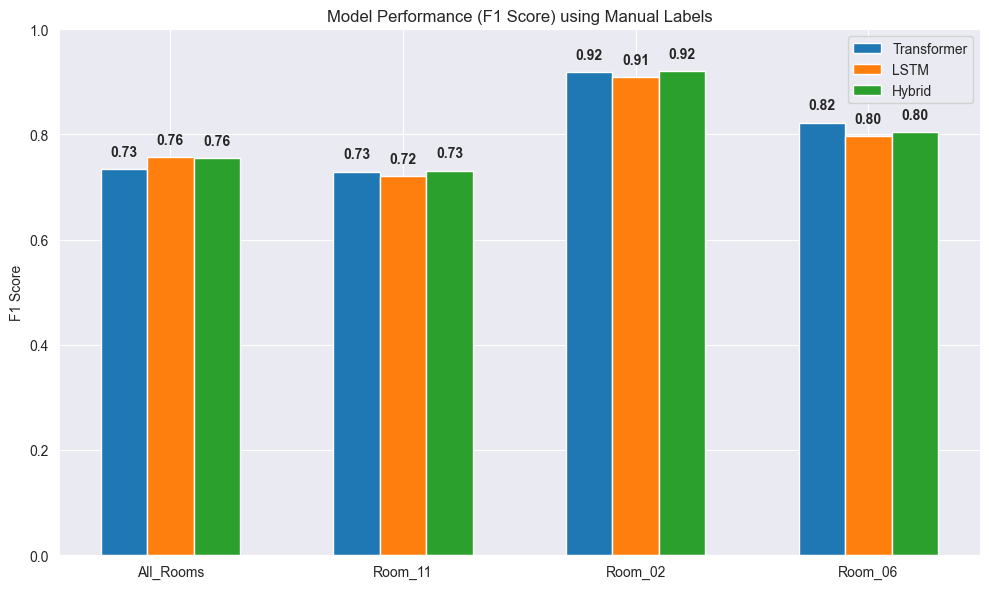

In [7]:
# Define F1 scores per model per evaluation type
Transformer_Schedule = {"All_Rooms": 0.720, "Room_11": 0.784, "Room_02": 0.903, "Room_06": 0.735} # AVG 0.785
Transformer_Manual = {"All_Rooms": 0.734, "Room_11": 0.729, "Room_02": 0.918, "Room_06": 0.822} # AVG 0.801
Transformer_Delay = {"All_Rooms": 0.695, "Room_11": 0.644, "Room_02": 0.878, "Room_06": 0.818} # AVG 0.759

LSTM_Schedule = {"All_Rooms": 0.764, "Room_11": 0.752, "Room_02": 0.881, "Room_06": 0.752} # AVG 0.787
LSTM_Manual = {"All_Rooms": 0.757, "Room_11": 0.721, "Room_02": 0.909, "Room_06": 0.797} # AVG 0.796
LSTM_Delay = {"All_Rooms": 0.000, "Room_11": 0.000, "Room_02": 0.000, "Room_06": 0.000} # AVG 0.000

Hybrid_Schedule = {"All_Rooms": 0.760, "Room_11": 0.792, "Room_02": 0.934, "Room_06": 0.742} # AVG 0.807
Hybrid_Manual = {"All_Rooms": 0.755, "Room_11": 0.731, "Room_02": 0.920, "Room_06": 0.804} # AVG 0.803
Hybrid_Delay = {"All_Rooms": 0.000, "Room_11": 0.000, "Room_02": 0.869, "Room_06": 0.000} # AVG 0.217

# Combine all model results for plotting
models = ['Transformer', 'LSTM', 'Hybrid']
settings = ['Schedule', 'Manual', 'Delay']
room_labels = ["All_Rooms", "Room_11", "Room_02", "Room_06"]

# Collect all values per setting per model
data = {
    'Schedule': {
        'Transformer': Transformer_Schedule,
        'LSTM': LSTM_Schedule,
        'Hybrid': Hybrid_Schedule
    },
    'Manual': {
        'Transformer': Transformer_Manual,
        'LSTM': LSTM_Manual,
        'Hybrid': Hybrid_Manual
    },
    'Delay': {
        'Transformer': Transformer_Delay,
        'LSTM': LSTM_Delay,
        'Hybrid': Hybrid_Delay
    }
}

bar_width = 0.2
x = np.arange(len(rooms))

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model using Manual labels
for idx, model in enumerate(models):
    scores = [data['Manual'][model][room] for room in room_labels]
    ax.bar(x + (idx - 1) * bar_width, scores, width=bar_width, label=model)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2,
                height + 0.02,
                f'{height:.2f}',
                ha='center',
                va='bottom',
                fontsize=10,
                weight='bold')

# Customize plot
ax.set_title('Model Performance (F1 Score) using Manual Labels')
ax.set_ylabel('F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(room_labels)
ax.set_ylim(0, 1.0)
ax.legend()

plt.tight_layout()
plt.show()

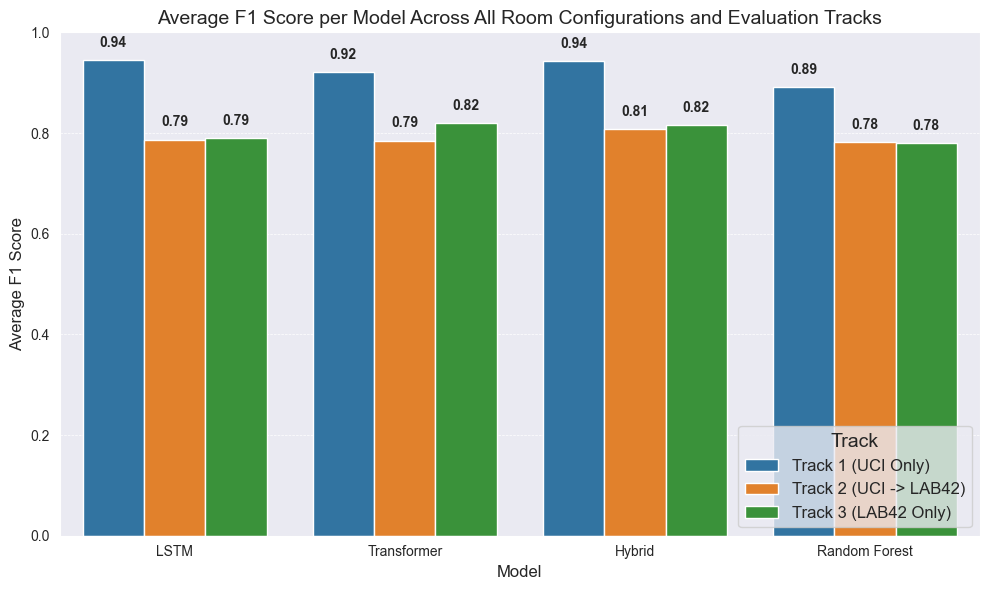

In [8]:
# Create F1 scores averaged per track across all room configurations for each model
# These are representative averages based on prior inputs/discussions

f1_avg_per_track = pd.DataFrame({
    "Model": ["LSTM", "Transformer", "Hybrid", "Random Forest"] * 3,
    "Track": ["Track 1 (UCI Only)"] * 4 + ["Track 2 (UCI -> LAB42)"] * 4 + ["Track 3 (LAB42 Only)"] * 4,
    "F1 Score": [
        0.945, 0.922, 0.943, 0.892,         # Track 1
        0.787, 0.785, 0.807, 0.783,         # Track 2 (avg across All and Per rooms)
        0.790, 0.820, 0.816, 0.781 ,         # Track 3 (avg across All and Per rooms)
    ]
})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=f1_avg_per_track, x="Model", y="F1 Score", hue="Track")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2,
                height + 0.02,
                f'{height:.2f}',
                ha='center',
                va='bottom',
                fontsize=10,
                weight='bold')

plt.title("Average F1 Score per Model Across All Room Configurations and Evaluation Tracks", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Average F1 Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.legend(title="Track", title_fontsize=14, fontsize=12, loc="lower right")
plt.tight_layout()
plt.show()
